# Overfitting and Underfitting
## https://scikit-learn.org/stable/auto_examples/model_selection/plot_underfitting_overfitting.html

## Program for understanding Overfitting and Underfitting

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score

In [ ]:
def true_fun(X):
    return np.cos(1.5 * np.pi * X)

In [ ]:
np.random.seed(0)

n_samples = 30
degrees = [1, 4, 15]

X = np.sort(np.random.rand(n_samples))
y = true_fun(X) + np.random.randn(n_samples) * 0.1

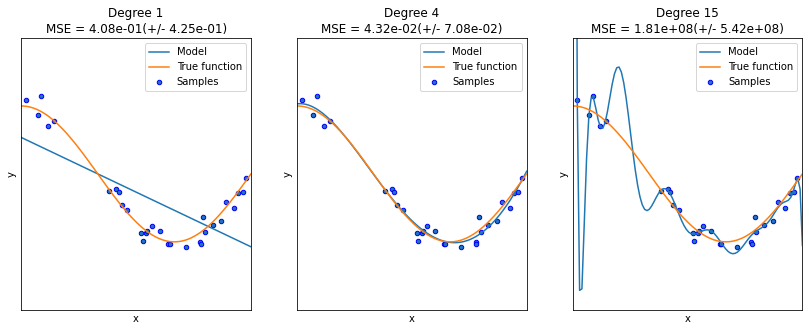

In [ ]:
plt.figure(figsize=(14, 5))
for i in range(len(degrees)):
    ax = plt.subplot(1, len(degrees), i + 1)
    plt.setp(ax, xticks=(), yticks=())

    polynomial_features = PolynomialFeatures(degree=degrees[i], include_bias=False)
    linear_regression = LinearRegression()
    pipeline = Pipeline(
        [
            ("polynomial_features", polynomial_features),
            ("linear_regression", linear_regression),
        ]
    )
    pipeline.fit(X[:, np.newaxis], y)

    # Evaluate the models using crossvalidation
    scores = cross_val_score(
        pipeline, X[:, np.newaxis], y, scoring="neg_mean_squared_error", cv=10
    )

    X_test = np.linspace(0, 1, 100)
    plt.plot(X_test, pipeline.predict(X_test[:, np.newaxis]), label="Model")
    plt.plot(X_test, true_fun(X_test), label="True function")
    plt.scatter(X, y, edgecolor="b", s=20, label="Samples")
    plt.xlabel("x")
    plt.ylabel("y")
    plt.xlim((0, 1))
    plt.ylim((-2, 2))
    plt.legend(loc="best")
    plt.title(
        "Degree {}\nMSE = {:.2e}(+/- {:.2e})".format(
            degrees[i], -scores.mean(), scores.std()
        )
    )
plt.show()

## Overfitting (Printing accuracy at different steps)
## https://machinelearningmastery.com/overfitting-machine-learning-models/

In [ ]:
# evaluate decision tree performance on train and test sets with different tree depths
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from matplotlib import pyplot

In [ ]:
# define dataset
X, y = make_classification(n_samples=10000, n_features=20, n_informative=5, n_redundant=15, random_state=1)
# summarize the dataset
print(X.shape, y.shape)

(10000, 20) (10000,)


In [ ]:
# split into train test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
# summarize the shape of the train and test sets
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(7000, 20) (3000, 20) (7000,) (3000,)


In [ ]:
train_scores, test_scores = list(), list()

# define the tree depths to evaluate
values = [i for i in range(1, 31)]

In [ ]:
# evaluate a decision tree for each depth
for i in values:
    # configure the model
    model = DecisionTreeClassifier(max_depth=i)
    # fit model on the training dataset
    model.fit(X_train, y_train)
    # evaluate on the train dataset
    train_yhat = model.predict(X_train)
    train_acc = accuracy_score(y_train, train_yhat)
    train_scores.append(train_acc)
    # evaluate on the test dataset
    test_yhat = model.predict(X_test)
    test_acc = accuracy_score(y_test, test_yhat)
    test_scores.append(test_acc)
    # summarize progress
    print('>%d, train: %.3f, test: %.3f' % (i, train_acc, test_acc))

>1, train: 0.763, test: 0.767
>2, train: 0.804, test: 0.805
>3, train: 0.871, test: 0.868
>4, train: 0.906, test: 0.890
>5, train: 0.924, test: 0.901
>6, train: 0.937, test: 0.912
>7, train: 0.947, test: 0.917
>8, train: 0.956, test: 0.914
>9, train: 0.966, test: 0.917
>10, train: 0.975, test: 0.911
>11, train: 0.981, test: 0.913
>12, train: 0.985, test: 0.909
>13, train: 0.990, test: 0.909
>14, train: 0.993, test: 0.907
>15, train: 0.995, test: 0.905
>16, train: 0.996, test: 0.910
>17, train: 0.997, test: 0.908
>18, train: 0.998, test: 0.904
>19, train: 0.999, test: 0.905
>20, train: 0.999, test: 0.903
>21, train: 1.000, test: 0.902
>22, train: 1.000, test: 0.905
>23, train: 1.000, test: 0.903
>24, train: 1.000, test: 0.901
>25, train: 1.000, test: 0.901
>26, train: 1.000, test: 0.906
>27, train: 1.000, test: 0.905
>28, train: 1.000, test: 0.900
>29, train: 1.000, test: 0.900
>30, train: 1.000, test: 0.908


# -------------------------------------------------------------------------------------------------------------

# Cross-validation

## https://scikit-learn.org/stable/modules/cross_validation.html

In [ ]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn import datasets
from sklearn import svm

X, y = datasets.load_iris(return_X_y=True)
X.shape, y.shape


((150, 4), (150,))

### Basic method to compute score

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.4, random_state=0)

X_train.shape, y_train.shape

X_test.shape, y_test.shape


clf = svm.SVC(kernel='linear', C=1).fit(X_train, y_train)
clf.score(X_test, y_test)



0.9666666666666667

### Estimate the accuracy by splitting the data, computing the score 5 consecutive times (with different splits each time)



In [ ]:
from sklearn.model_selection import cross_val_score
clf = svm.SVC(kernel='linear', C=1, random_state=42)
scores = cross_val_score(clf, X, y, cv=5)
scores


array([0.96666667, 1.        , 0.96666667, 0.96666667, 1.        ])

In [ ]:
print("%0.2f accuracy with a standard deviation of %0.2f" % (scores.mean(), scores.std()))

0.98 accuracy with a standard deviation of 0.02


### Using the different scoring parameter

In [ ]:
from sklearn import metrics

scores = cross_val_score(
    clf, X, y, cv=5, scoring='f1_macro')
scores



array([0.96658312, 1.        , 0.96658312, 0.96658312, 1.        ])

### Specified multiple metrics of predefined scorer names

In [ ]:
from sklearn.model_selection import cross_validate
from sklearn.metrics import recall_score

scoring = ['precision_macro', 'recall_macro']
clf = svm.SVC(kernel='linear', C=1, random_state=0)
scores = cross_validate(clf, X, y, scoring=scoring)
sorted(scores.keys())

scores['test_recall_macro']

array([0.96666667, 1.        , 0.96666667, 0.96666667, 1.        ])

### Calculate cross validation score by passing a cross validation iterator 

In [ ]:
from sklearn.model_selection import ShuffleSplit
n_samples = X.shape[0]
cv = ShuffleSplit(n_splits=5, test_size=0.3, random_state=0)
cross_val_score(clf, X, y, cv=cv)


array([0.97777778, 0.97777778, 1.        , 0.95555556, 1.        ])

### Use an iterable yielding (train, test) splits as arrays of indices

In [ ]:
def custom_cv_2folds(X):
    n = X.shape[0]
    i = 1
    while i <= 2:
        idx = np.arange(n * (i - 1) / 2, n * i / 2, dtype=int)
        yield idx, idx
        i += 1

custom_cv = custom_cv_2folds(X)
cross_val_score(clf, X, y, cv=custom_cv)

array([1.        , 0.97333333])

## Different type of Cross validation iterators


### K-fold


In [ ]:
import numpy as np
from sklearn.model_selection import KFold

X = ["a", "b", "c", "d"]
kf = KFold(n_splits=2)
for train, test in kf.split(X):
    print("%s %s" % (train, test))


[2 3] [0 1]
[0 1] [2 3]


### Repeated K-Fold

In [ ]:
import numpy as np
from sklearn.model_selection import RepeatedKFold
X = np.array([[1, 2], [3, 4], [1, 2], [3, 4]])
random_state = 12883823
rkf = RepeatedKFold(n_splits=2, n_repeats=2, random_state=random_state)
for train, test in rkf.split(X):
    print("%s %s" % (train, test))


[2 3] [0 1]
[0 1] [2 3]
[0 2] [1 3]
[1 3] [0 2]


### Leave One Out (LOO)

In [ ]:
from sklearn.model_selection import LeaveOneOut

X = [1, 2, 3, 4]
loo = LeaveOneOut()
for train, test in loo.split(X):
    print("%s %s" % (train, test))



[1 2 3] [0]
[0 2 3] [1]
[0 1 3] [2]
[0 1 2] [3]


## **StratifiedGroupKFold**

In [ ]:
from sklearn.model_selection import StratifiedGroupKFold
X = list(range(18))
y = [1] * 6 + [0] * 12
groups = [1, 2, 3, 3, 4, 4, 1, 1, 2, 2, 3, 4, 5, 5, 5, 6, 6, 6]
sgkf = StratifiedGroupKFold(n_splits=3)
for train, test in sgkf.split(X, y, groups=groups):
   print("%s %s" % (train, test))

[ 0  2  3  4  5  6  7 10 11 15 16 17] [ 1  8  9 12 13 14]
[ 0  1  4  5  6  7  8  9 11 12 13 14] [ 2  3 10 15 16 17]
[ 1  2  3  8  9 10 12 13 14 15 16 17] [ 0  4  5  6  7 11]


## LeaveOneGroupOut

In [ ]:
from sklearn.model_selection import LeaveOneGroupOut

X = [1, 5, 10, 50, 60, 70, 80]
y = [0, 1, 1, 2, 2, 2, 2]
groups = [1, 1, 2, 2, 3, 3, 3]
logo = LeaveOneGroupOut()
for train, test in logo.split(X, y, groups=groups):
 print("%s %s" % (train, test))

[2 3 4 5 6] [0 1]
[0 1 4 5 6] [2 3]
[0 1 2 3] [4 5 6]


# GroupShuffleSplit

In [ ]:
from sklearn.model_selection import GroupShuffleSplit

X = [0.1, 0.2, 2.2, 2.4, 2.3, 4.55, 5.8, 0.001]
y = ["a", "b", "b", "b", "c", "c", "c", "a"]
groups = [1, 1, 2, 2, 3, 3, 4, 4]
gss = GroupShuffleSplit(n_splits=4, test_size=0.5, random_state=0)
for train, test in gss.split(X, y, groups=groups):
    print("%s %s" % (train, test))

[0 1 2 3] [4 5 6 7]
[2 3 6 7] [0 1 4 5]
[2 3 4 5] [0 1 6 7]
[4 5 6 7] [0 1 2 3]


# -------------------------------------------------------------------------------------------------------------


# Validation curve

## https://keeeto.github.io/blog/bias_variance/
## https://scikit-learn.org/stable/modules/learning_curve.html

In [ ]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score, learning_curve, validation_curve


In [ ]:
df_train = pd.read_csv('train.csv')
df_test = pd.read_csv('test.csv')
df_comb = df_train.append(df_test)

X = pd.DataFrame()


In [ ]:
def encode_sex(x):
    return 1 if x == 'female' else 0

def family_size(x):
    size = x.SibSp + x.Parch 
    return 4 if size > 3 else size

X['Sex'] = df_comb.Sex.map(encode_sex)
X['Pclass'] = df_comb.Pclass
X['FamilySize'] = df_comb.apply(family_size, axis=1)

In [ ]:
fare_median = df_train.groupby(['Sex', 'Pclass']).Fare.median()
fare_median.name = 'FareMedian'

age_mean = df_train.groupby(['Sex', 'Pclass']).Age.mean()
age_mean.name = 'AgeMean'

def join(df, stat):
    return pd.merge(df, stat.to_frame(), left_on=['Sex', 'Pclass'], right_index=True, how='left')

X['Fare'] = df_comb.Fare.fillna(join(df_comb, fare_median).FareMedian)
X['Age'] = df_comb.Age.fillna(join(df_comb, age_mean).AgeMean)

In [ ]:
def quantiles(series, num):
    return pd.qcut(series, num, retbins=True)[1]

def discretize(series, bins):
    return pd.cut(series, bins, labels=range(len(bins)-1), include_lowest=True)
    
X['Fare'] = discretize(X.Fare, quantiles(df_comb.Fare, 10))
X['Age'] = discretize(X.Age, quantiles(df_comb.Age, 10))


In [ ]:
X_train = X.iloc[:df_train.shape[0]]
X_test = X.iloc[df_train.shape[0]:]

y_train = df_train.Survived


In [ ]:
clf_1 = RandomForestClassifier(n_estimators=100, bootstrap=True, random_state=0)
clf_1.fit(X_train, y_train)
# Number of folds for cross validation
num_folds = 7

In [ ]:
def plot_curve(ticks, train_scores, test_scores):
    train_scores_mean = -1 * np.mean(train_scores, axis=1)
    train_scores_std = -1 * np.std(train_scores, axis=1)
    test_scores_mean = -1 * np.mean(test_scores, axis=1)
    test_scores_std = -1 * np.std(test_scores, axis=1)

    plt.figure()
    plt.fill_between(ticks, 
                     train_scores_mean - train_scores_std, 
                     train_scores_mean + train_scores_std, alpha=0.1, color="b")
    plt.fill_between(ticks, 
                     test_scores_mean - test_scores_std, 
                     test_scores_mean + test_scores_std, alpha=0.1, color="r")
    plt.plot(ticks, train_scores_mean, 'b-', label='Training score')
    plt.plot(ticks, test_scores_mean, 'r-', label='Validation score')
    plt.legend(fancybox=True, facecolor='w')

    return plt.gca()


In [ ]:
def plot_validation_curve(clf, X, y, param_name, param_range, scoring='roc_auc'):
    plt.xkcd()
    ax = plot_curve(param_range, *validation_curve(clf, X, y, cv=num_folds, 
                                                   scoring=scoring, 
                                                   param_name=param_name, 
                                                   param_range=param_range, n_jobs=-1))
    ax.set_title('')
    ax.set_xticklabels([])
    ax.set_yticklabels([])
    ax.set_xlim(2,12)
    ax.set_ylim(-0.97, -0.83)
    ax.set_ylabel('Error')
    ax.set_xlabel('Model complexity')
    ax.text(9, -0.94, 'Overfitting', fontsize=22)
    ax.text(3, -0.94, 'Underfitting', fontsize=22)
    ax.axvline(7, ls='--')
    plt.tight_layout()
    

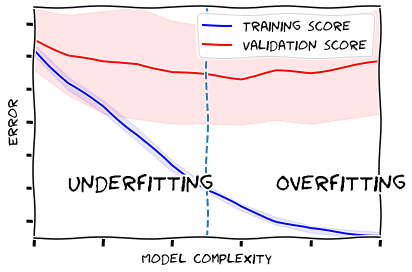

In [ ]:
plot_validation_curve(clf_1, X_train, y_train, param_name='max_depth', param_range=range(2,13))


# -------------------------------------------------------------------------------------------------------------


# ROC
## https://www.statology.org/plot-roc-curve-python/

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
import matplotlib.pyplot as plt

In [ ]:
#import dataset from CSV file on Github
url = "https://raw.githubusercontent.com/Statology/Python-Guides/main/default.csv"
data = pd.read_csv(url)

#define the predictor variables and the response variable
X = data[['student', 'balance', 'income']]
y = data['default']

#split the dataset into training (70%) and testing (30%) sets
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=0) 

#instantiate the model
log_regression = LogisticRegression()

#fit the model using the training data
log_regression.fit(X_train,y_train)

LogisticRegression()

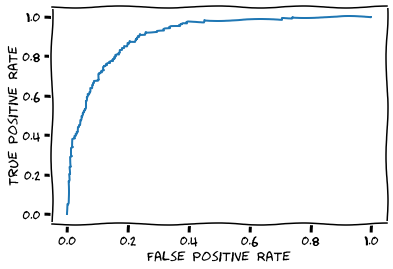

In [ ]:
#define metrics
y_pred_proba = log_regression.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)

#create ROC curve
plt.plot(fpr,tpr)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

# Task 1: Perform all of the above codes of Overfitting, Cross Validation, etc. with the help of the given reference link.

# Task 2: Explain your analysis of the code. Make a detailed analysis that can also cover the following questions: (Submit the PDF of Report)

###             1) According to you, why do overfitting and underfitting occur, and how resolve them? What is the difference between them?
###             2) What kind of pattern did you analyze in the Train and Test score while running the code of overfitting?
###             3) What is cross-validation, and what did you analyze in a different type of validation that you performed?
###             4) Explain the analysis from generated ROC and validation curve and what they represent?

# Task 3: Using the given Cross Validation iterators perform all types of Cross Validations we did in the task :
	
###             1) K-fold
###             2) Repeated K-Fold
###             3) Leave One Out (LOO)

## Apart from this three, try to perform validation using three new iterators.

# Task 4: With the help of the given code and references complete all of the following step:
  
###            1) Choose one new dataset. Train a overfitted model with the help of any machine learning technique, such as KNN, classification, regression.
###            2) Try to resolve the overfitting.
###            3) Calculate the Validation score by any two or three given techniques and Validation iterators.
###           4) Generate the validation curve 
###           5) Predict the output of testing data.
###           6) Generate the ROC curve using the predicted data and actual data.

	

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score

In [ ]:
from sklearn.datasets import load_digits
X, y = make_classification(n_samples=5000, n_features=20, n_informative=15)

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, shuffle=True)

print(len(X),len(X_train),len(X_test))

5000 4000 1000


In [ ]:
from sklearn.neighbors import KNeighborsClassifier
# Create KNN classifier
knn = KNeighborsClassifier(n_neighbors = 3)
# Fit the classifier to the data
knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=3)

In [ ]:
#show first 5 model predictions on the test data
knn.predict(X_test)[0:5]

array([0, 1, 1, 1, 1])

In [ ]:
knn.score(X_test, y_test)

0.934

In [ ]:
from sklearn.model_selection import ShuffleSplit
n_samples = X.shape[0]
cv = ShuffleSplit(n_splits=5, test_size=0.3, random_state=0)
cross_val_score(clf, X, y, cv=cv)


array([0.74066667, 0.73266667, 0.726     , 0.74866667, 0.72      ])

In [ ]:
def custom_cv_2folds(X):
    n = X.shape[0]
    i = 1
    while i <= 2:
        idx = np.arange(n * (i - 1) / 2, n * i / 2, dtype=int)
        yield idx, idx
        i += 1

custom_cv = custom_cv_2folds(X)
cross_val_score(clf, X, y, cv=custom_cv)

array([0.748 , 0.7364])

In [ ]:
import numpy as np
from sklearn.model_selection import KFold

X = ["a", "b", "c", "d"]
kf = KFold(n_splits=2)
for train, test in kf.split(X):
     print("%s %s" % (train, test))

[2 3] [0 1]
[0 1] [2 3]


In [ ]:
import numpy as np
from sklearn.model_selection import RepeatedKFold
X = np.array([[1, 2], [3, 4], [1, 2], [3, 4]])
random_state = 12883823
rkf = RepeatedKFold(n_splits=2, n_repeats=2, random_state=random_state)
for train, test in rkf.split(X):
    print("%s %s" % (train, test))
    

[2 3] [0 1]
[0 1] [2 3]
[0 2] [1 3]
[1 3] [0 2]


In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import validation_curve

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import load_digits
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import validation_curve

In [ ]:
digits = load_digits()

# Create feature matrix and target vector
X, y = digits.data, digits.target

In [ ]:
train_scores, test_scores = list(), list()

# define the tree depths to evaluate
values = [i for i in range(1, 31)]


In [145]:
for i in values:
    # configure the model
    model = RandomForestClassifier(max_depth=i)
    # fit model on the training dataset
    model.fit(X_train, y_train)
    # evaluate on the train dataset
    train_yhat = model.predict(X_train)
    train_acc = accuracy_score(y_train, train_yhat)
    train_scores.append(train_acc)
    # evaluate on the test dataset
    test_yhat = model.predict(X_test)
    test_acc = accuracy_score(y_test, test_yhat)
    test_scores.append(test_acc)
    # summarize progress
    print('>%d, train: %.3f, test: %.3f' % (i, train_acc, test_acc))
    plt.show()

>1, train: 0.903, test: 0.893
>2, train: 0.922, test: 0.909
>3, train: 0.984, test: 0.960
>4, train: 0.996, test: 0.980
>5, train: 0.998, test: 0.987
>6, train: 0.999, test: 0.993
>7, train: 1.000, test: 0.993
>8, train: 1.000, test: 0.993
>9, train: 1.000, test: 0.996
>10, train: 1.000, test: 0.996
>11, train: 1.000, test: 0.993
>12, train: 1.000, test: 0.993
>13, train: 1.000, test: 0.996
>14, train: 1.000, test: 0.991
>15, train: 1.000, test: 0.991
>16, train: 1.000, test: 0.993
>17, train: 1.000, test: 0.991
>18, train: 1.000, test: 0.991
>19, train: 1.000, test: 0.993
>20, train: 1.000, test: 0.987
>21, train: 1.000, test: 0.993
>22, train: 1.000, test: 0.989
>23, train: 1.000, test: 0.996
>24, train: 1.000, test: 0.993
>25, train: 1.000, test: 0.996
>26, train: 1.000, test: 0.996
>27, train: 1.000, test: 0.993
>28, train: 1.000, test: 0.996
>29, train: 1.000, test: 0.993
>30, train: 1.000, test: 0.991


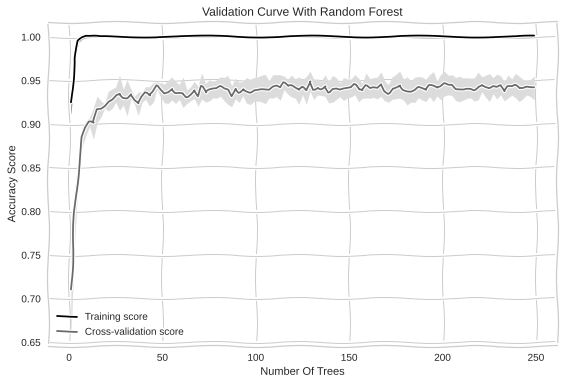

In [ ]:
param_range = np.arange(1, 250, 2)

# Calculate accuracy on training and test set using range of parameter values
train_scores, test_scores = validation_curve(RandomForestClassifier(), 
                                             X, 
                                             y, 
                                             param_name="n_estimators", 
                                             param_range=param_range,
                                             cv=3, 
                                             scoring="accuracy", 
                                             n_jobs=-1)
# Calculate mean and standard deviation for training set scores
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)

# Calculate mean and standard deviation for test set scores
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

# Plot mean accuracy scores for training and test sets
plt.plot(param_range, train_mean, label="Training score", color="black")
plt.plot(param_range, test_mean, label="Cross-validation score", color="dimgrey")

# Plot accurancy bands for training and test sets
plt.fill_between(param_range, train_mean - train_std, train_mean + train_std, color="gray")
plt.fill_between(param_range, test_mean - test_std, test_mean + test_std, color="gainsboro")

# Create plot
plt.title("Validation Curve With Random Forest")
plt.xlabel("Number Of Trees")
plt.ylabel("Accuracy Score")
plt.tight_layout()
plt.legend(loc="best")
plt.show()

In [ ]:
from sklearn.datasets import load_digits
digits = load_digits()



In [ ]:
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(digits.data, digits.target)
clf = GaussianNB()
clf.fit(X_train, y_train)



GaussianNB()

In [ ]:
predicted = clf.predict(X_test)
expected = y_test
print(predicted) 

[5 7 1 5 7 7 7 4 7 4 2 0 7 2 7 0 4 3 5 7 7 7 9 9 3 3 3 5 8 5 4 0 5 7 5 9 0
 8 7 2 2 1 6 1 4 6 7 9 6 2 7 1 6 8 7 7 7 7 3 8 2 8 1 8 4 2 0 5 7 7 3 1 8 1
 7 2 7 2 8 7 7 7 4 6 0 5 8 9 8 7 6 0 6 0 1 9 7 4 1 2 0 7 5 6 1 8 8 7 0 8 6
 0 5 6 4 3 5 6 5 0 6 3 7 1 1 3 4 7 6 6 9 8 4 6 6 4 3 2 7 6 6 6 6 3 8 7 8 6
 7 4 2 2 1 6 8 1 8 7 5 3 8 2 8 8 4 2 1 2 7 8 0 6 9 9 8 0 5 0 1 3 7 6 7 5 5
 7 7 6 0 6 2 2 1 7 4 9 7 9 1 8 8 7 6 8 2 1 7 8 2 2 6 8 2 3 7 9 4 1 4 3 9 6
 8 8 9 0 6 5 9 9 6 6 7 5 6 5 2 8 7 8 7 8 3 7 5 7 8 0 9 4 1 0 3 6 6 0 2 7 4
 8 6 0 7 4 9 1 7 7 2 4 8 9 0 8 6 9 2 1 9 2 1 0 2 0 4 5 9 3 7 3 6 3 8 1 6 5
 1 0 2 8 5 4 6 6 2 1 9 6 1 4 8 3 9 4 5 5 2 4 7 3 3 6 1 2 9 0 9 5 5 0 1 1 6
 5 8 4 9 2 8 2 0 5 4 0 7 4 7 3 2 8 0 6 7 6 5 4 8 5 7 6 0 5 2 3 2 1 7 2 5 7
 1 7 6 4 4 7 0 1 0 1 8 6 5 5 5 5 2 6 7 6 3 2 7 7 3 9 5 4 1 6 8 3 2 2 0 7 2
 8 1 7 4 8 9 2 0 3 1 3 4 8 5 4 8 3 8 1 8 5 7 9 6 3 9 9 9 8 1 3 3 5 0 2 0 4
 4 0 8 7 1 3]


In [126]:
print(expected) 

[5 7 1 5 7 3 9 4 7 4 3 0 7 2 7 0 9 3 5 7 7 7 9 9 3 9 3 3 8 5 4 0 5 7 5 9 0
 8 7 2 2 1 6 1 4 3 7 9 6 2 7 1 6 8 7 7 7 7 3 8 2 8 1 1 4 2 0 5 7 4 3 1 8 1
 7 2 7 2 8 7 5 7 4 6 0 5 8 9 8 7 6 0 6 0 1 9 5 4 1 2 0 5 5 6 1 1 2 7 0 8 6
 0 5 6 4 8 5 6 5 0 6 3 7 1 1 2 4 7 6 6 9 8 4 1 6 4 3 2 7 6 6 6 6 3 8 7 8 6
 7 4 2 2 1 6 8 1 8 7 5 3 8 2 9 8 4 2 1 2 7 8 0 6 9 1 5 0 5 0 1 3 7 6 7 5 0
 1 7 6 0 6 2 2 1 7 4 9 7 9 1 8 3 7 6 8 2 8 7 9 2 2 2 3 2 3 7 9 4 1 4 3 9 6
 9 3 9 0 6 5 9 9 6 6 7 5 6 5 2 2 3 8 9 8 3 7 5 7 8 0 9 4 1 0 3 6 6 0 2 7 4
 2 6 0 7 4 9 2 7 7 2 4 9 9 0 8 6 9 2 1 9 9 1 0 2 0 4 5 9 3 7 9 6 3 8 1 6 5
 2 0 2 8 5 0 1 6 2 8 9 6 1 4 8 3 9 4 5 5 2 4 8 3 3 6 1 2 1 0 9 5 5 0 9 9 6
 5 8 4 9 2 5 2 0 5 4 0 7 4 9 3 2 2 0 6 9 6 5 4 9 5 7 6 0 5 2 3 2 1 4 2 5 8
 1 1 6 4 4 7 0 1 0 1 9 1 8 5 5 7 2 6 4 6 3 2 8 7 3 9 5 4 1 6 3 3 3 2 0 4 2
 2 1 7 4 2 9 1 0 3 1 3 4 8 3 4 2 3 8 1 8 5 7 9 6 3 9 9 9 8 1 3 3 5 0 2 0 4
 4 0 8 7 1 3]


In [130]:
from sklearn import datasets

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [132]:
dataset = datasets.load_digits()
X = dataset.data
y = dataset.target

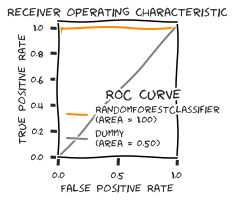

In [144]:
from sklearn import datasets, ensemble, metrics, model_selection, dummy
import matplotlib.pyplot as plt

digits = datasets.load_digits()

# First we work only on sevens:
sevens = (digits.target == 7)

classifier = ensemble.RandomForestClassifier()
most_frequent = dummy.DummyClassifier(strategy='most_frequent')

X_train, X_test, y_train, y_test = model_selection.train_test_split(
    digits.data, sevens, random_state=0)

y_score = classifier.fit(X_train, y_train).predict_proba(X_test)
most_frequent_score = most_frequent.fit(X_train,
                                        y_train).predict_proba(X_test)

fpr, tpr, _ = metrics.roc_curve(y_test, y_score[:, 1])
roc_auc = metrics.auc(fpr, tpr)

fpr_dummy, tpr_dummy, _ = metrics.roc_curve(y_test,
                                            most_frequent_score[:, 1])
roc_auc_dummy = metrics.auc(fpr_dummy, tpr_dummy)

plt.figure(figsize=(3, 3))
lw = 2
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='RandomForestClassifier\n(area = %0.2f)' % roc_auc)
plt.plot(fpr_dummy, tpr_dummy, color='.5',
         lw=lw, label='Dummy\n(area = %0.2f)' % roc_auc_dummy)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower left", title='ROC curve')
plt.tight_layout()
plt.show()